In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Create speckles

In [3]:
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

Create Longitudinal Speckles

In [4]:
import logging

for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.075,
        kmax=0.975,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.075,
        kmax=0.975,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 2
INFO:create_speckles:group: endo
INFO:create_speckles:collection:

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [5]:
import logging
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: superapex
INFO:create_speckles:group: endo
INFO:c

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Metrics

## Geo Metrics (formely geochars)

Volume:

Spks-data relationship not found for metric volume. Check 'set_data_spk_rel' or 'add_spk_data'.


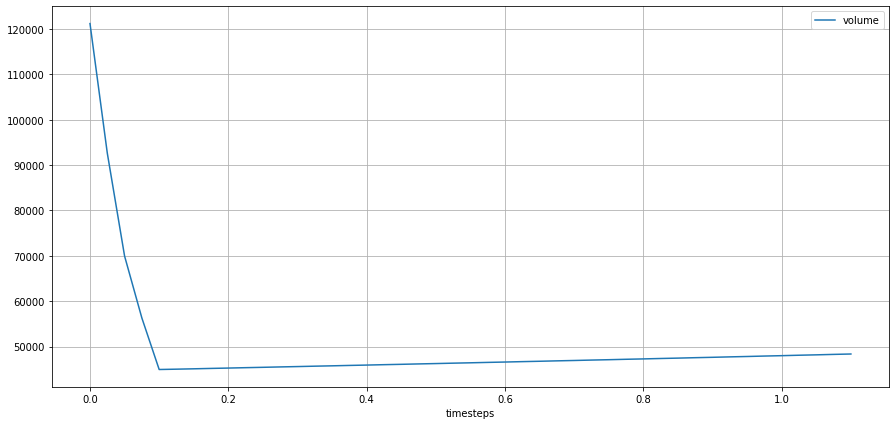

In [6]:
lv.volume()
lv.plot_metric(lv.STATES.VOLUME, kind="line")

Longitudinal Distances:

Spks-data relationship not found for metric longitudinal_distances. Check 'set_data_spk_rel' or 'add_spk_data'.


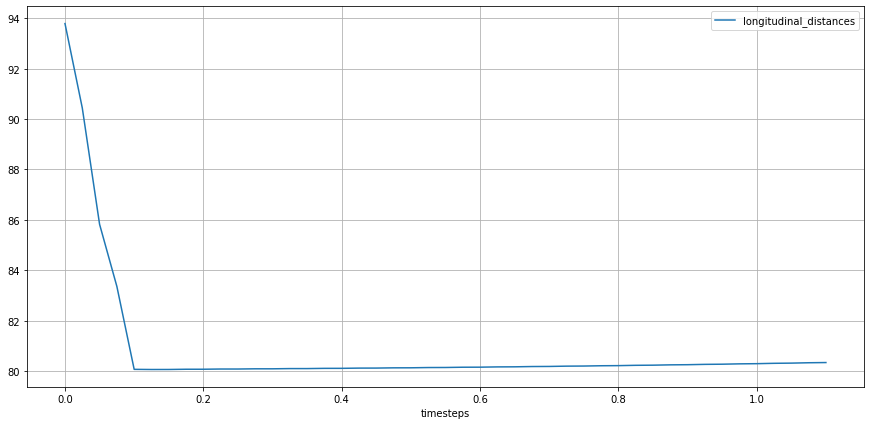

In [7]:
lv.longitudinal_distances()
lv.plot_metric(lv.STATES.LONG_DISTS, kind="line")

### Geo Metrics that do require speckles:

Radius (for each spk):

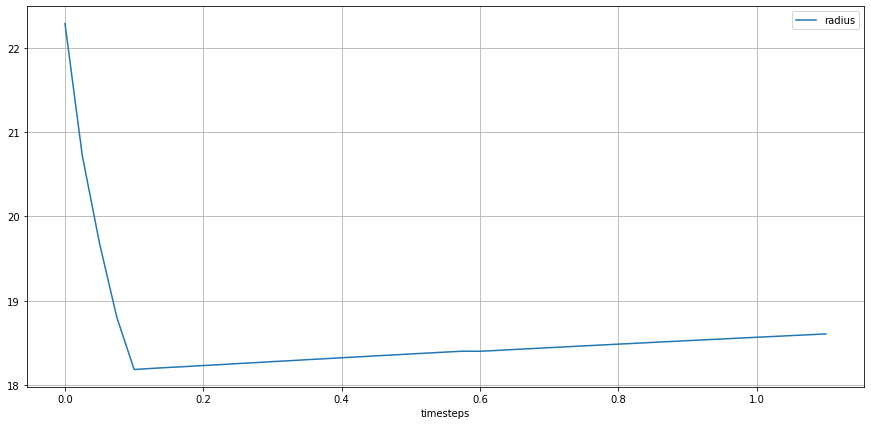

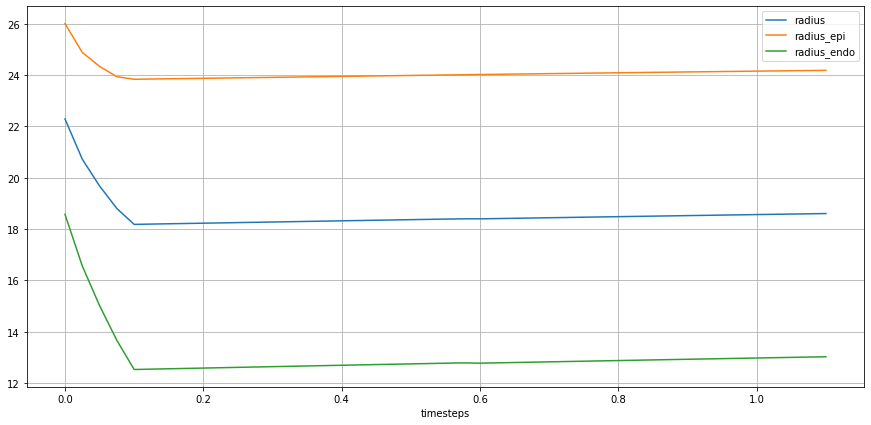

In [8]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.radius(circ_spks)
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0,
    plot_infos=["group"])

Thickness

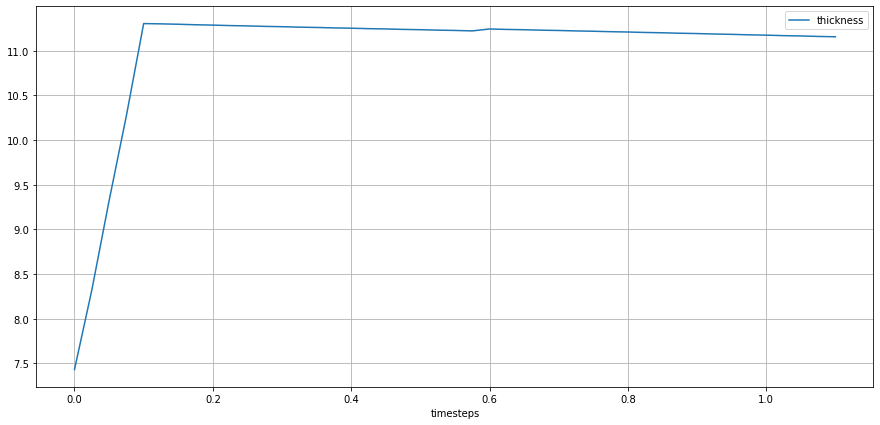

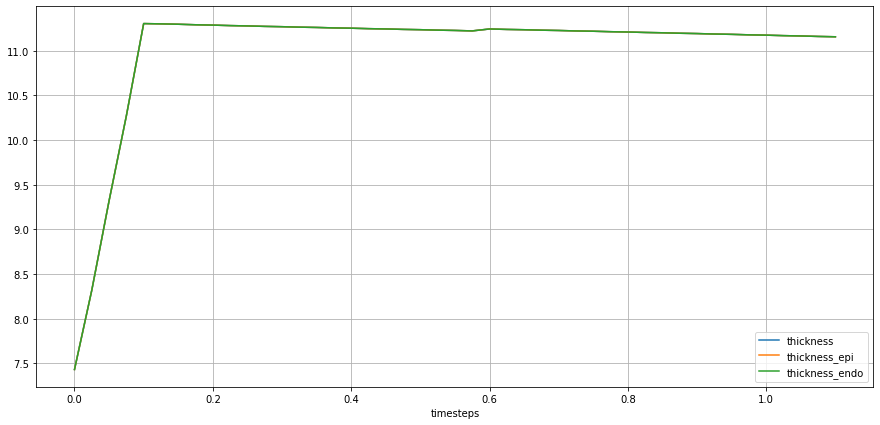

In [9]:
endo_circ_spks = lv.get_speckles(spk_name="base", spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_name="base", spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks)
lv.plot_metric(lv.STATES.THICKNESS,     
    from_ts=0.0,
    plot_infos=["group"])

Longitudinal Length:

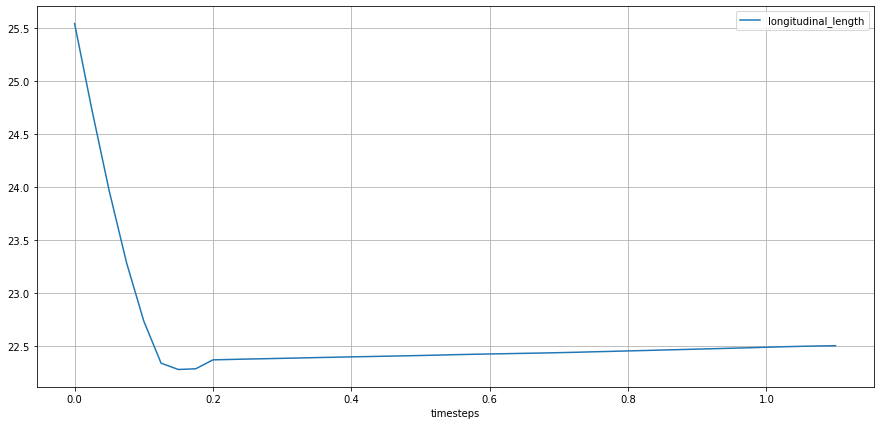

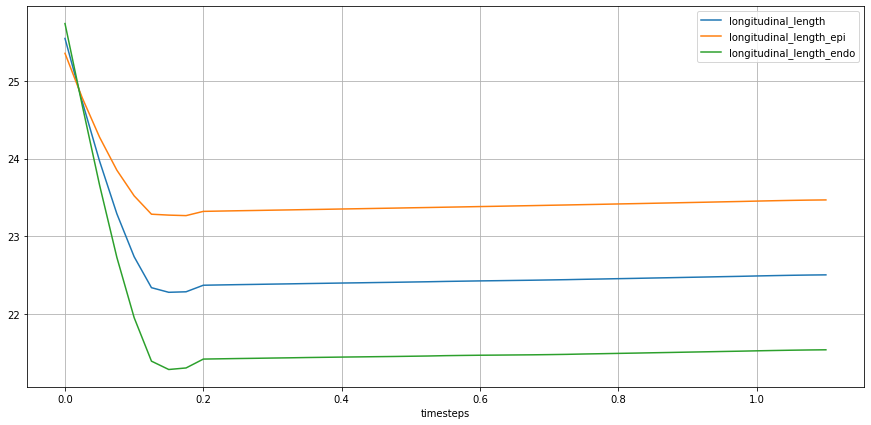

In [10]:
long_spks = lv.get_speckles(spk_name="0", spk_collection="long-6")
lv.longitudinal_length(long_spks)
lv.plot_metric(lv.STATES.LONG_LENGTH, 
    from_ts=0.0,
    plot_infos=["group"])

Circumferential Length:

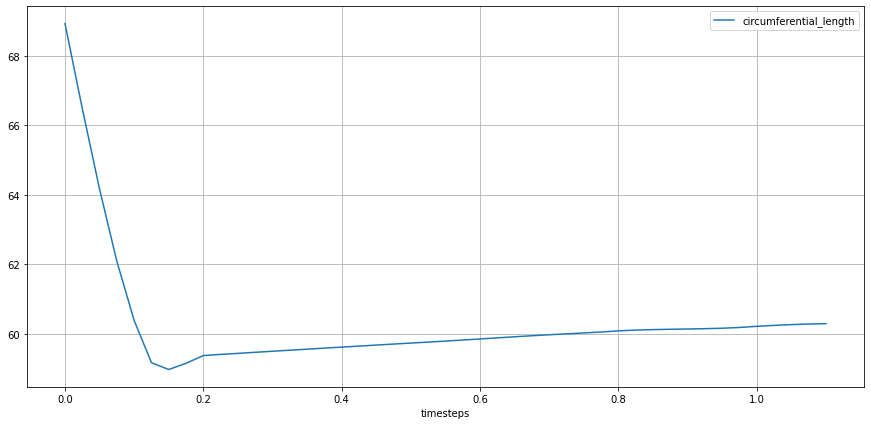

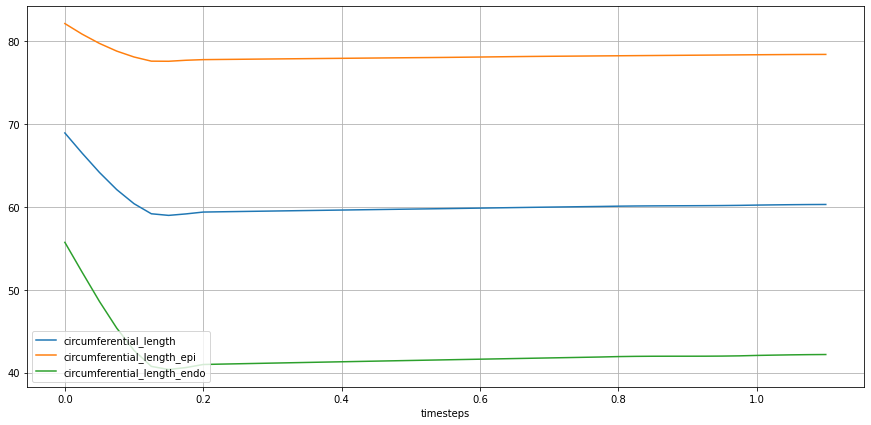

In [11]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.circumferential_length(circ_spks)
lv.plot_metric(lv.STATES.CIRC_LENGTH, 
    from_ts=0.0,
    plot_infos=["group"])

Rotation:

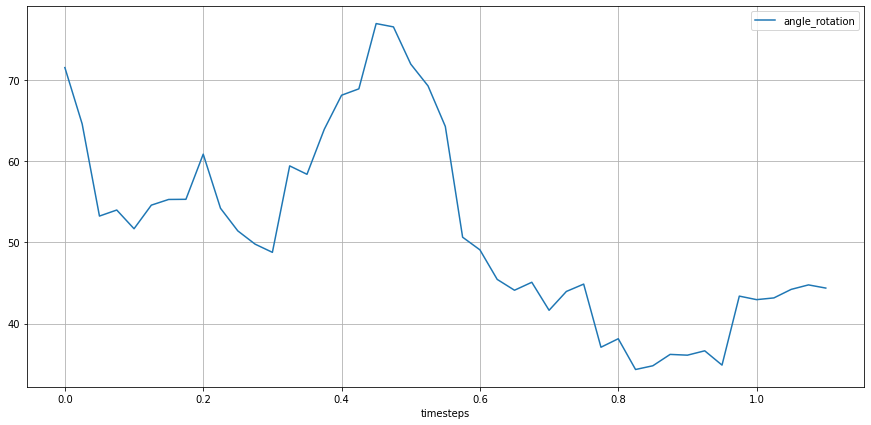

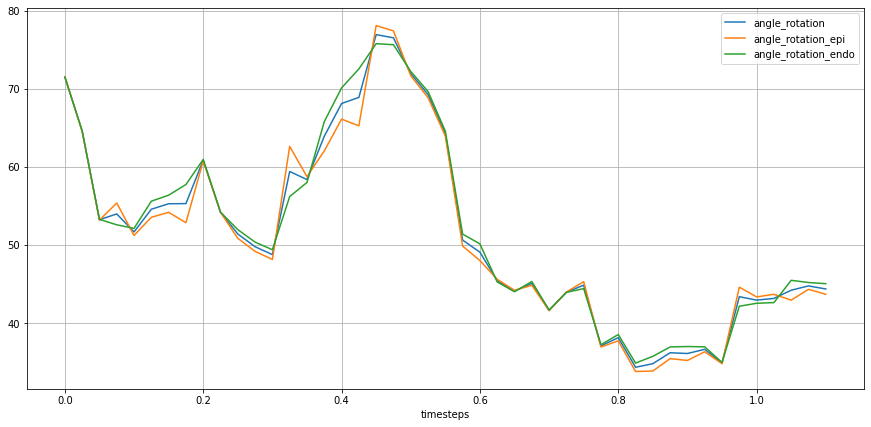

In [12]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.rotation(circ_spks)
lv.plot_metric(lv.STATES.ROTATION, 
    from_ts=0.0,
    plot_infos=["group"])

## Clinical Metrics:

### Clinical metrics that do not require speckles

Ejection Fraction

Spks-data relationship not found for metric volumetric_fraction. Check 'set_data_spk_rel' or 'add_spk_data'.


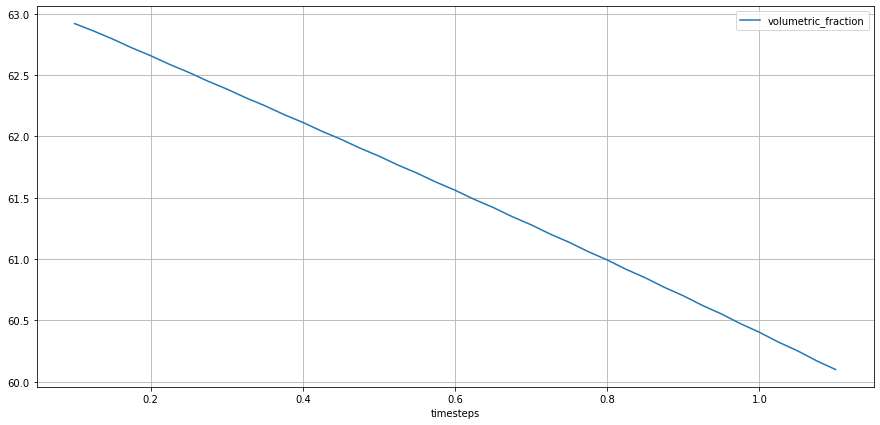

In [13]:
lv.ejection_fraction()
lv.plot_metric(lv.STATES.EF, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal Shortening:

Spks-data relationship not found for metric longitudinal_shortening. Check 'set_data_spk_rel' or 'add_spk_data'.


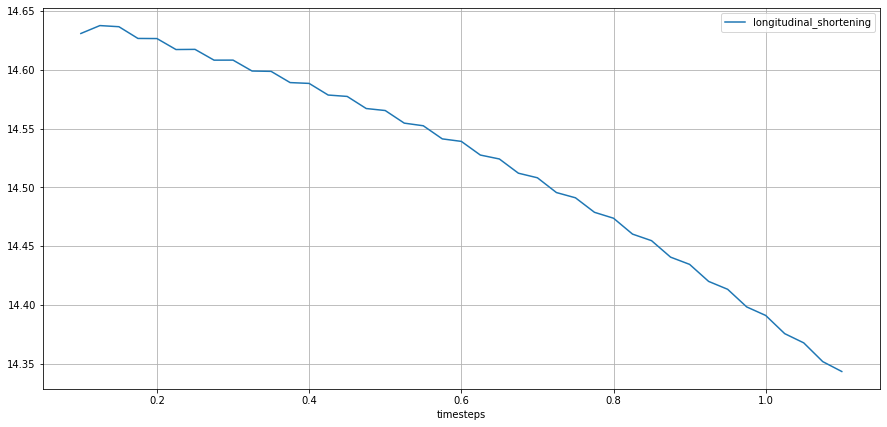

In [14]:
lv.longitudinal_shortening()
lv.plot_metric(lv.STATES.LS, 
    from_ts=0.1,
    plot_infos=["group"])

### Clinical metrics that require speckles

Radial shortening


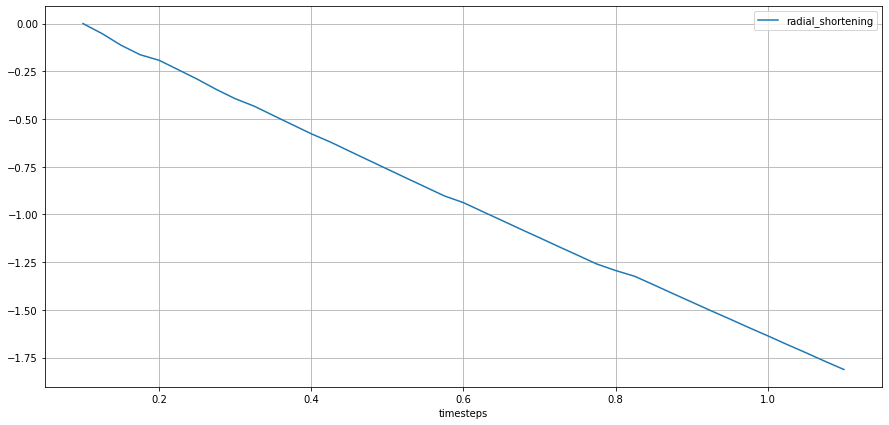

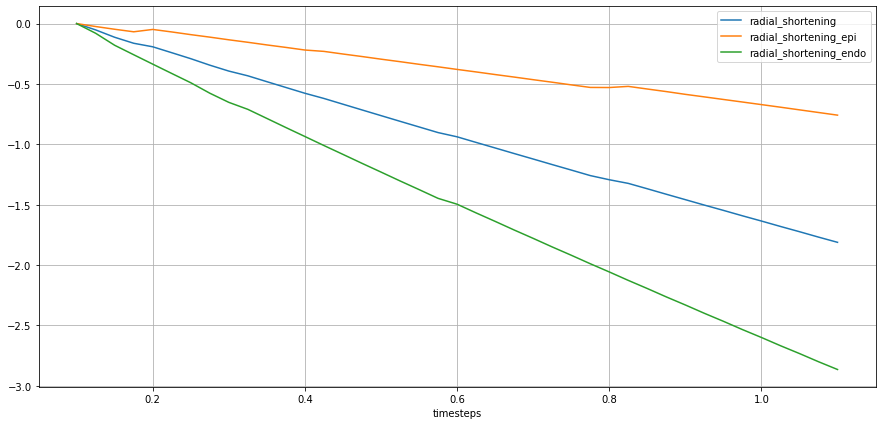

In [15]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.RS, 
    from_ts=0.1,
    plot_infos=["group"])

Wall thickening:

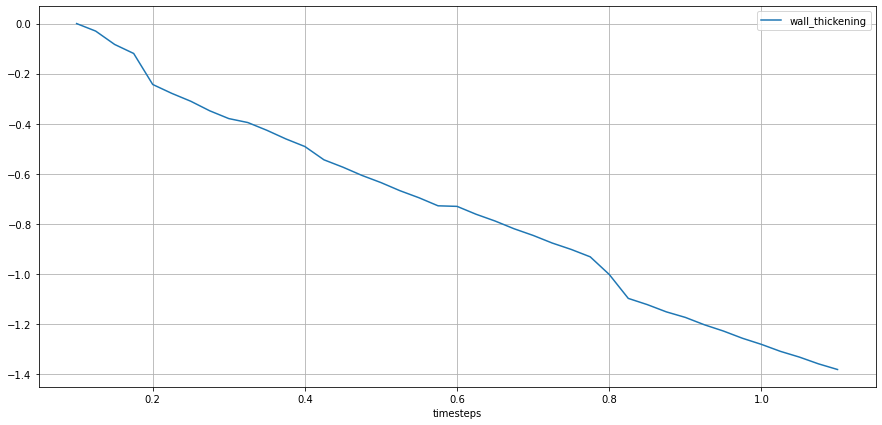

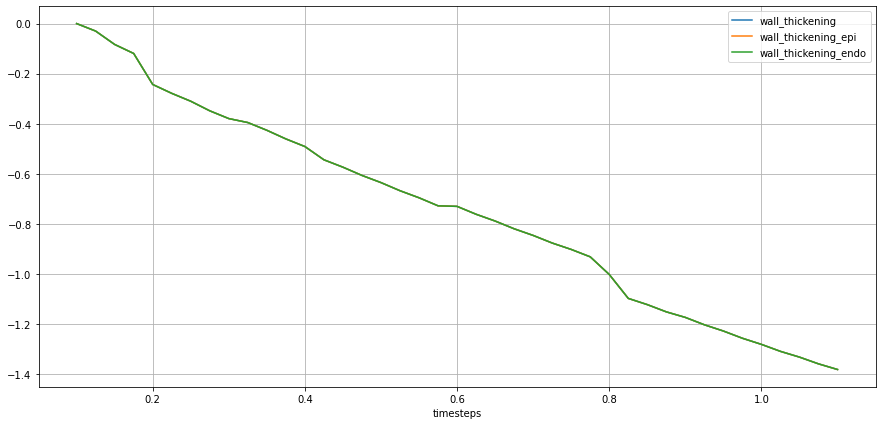

In [16]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.WT, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal strain:

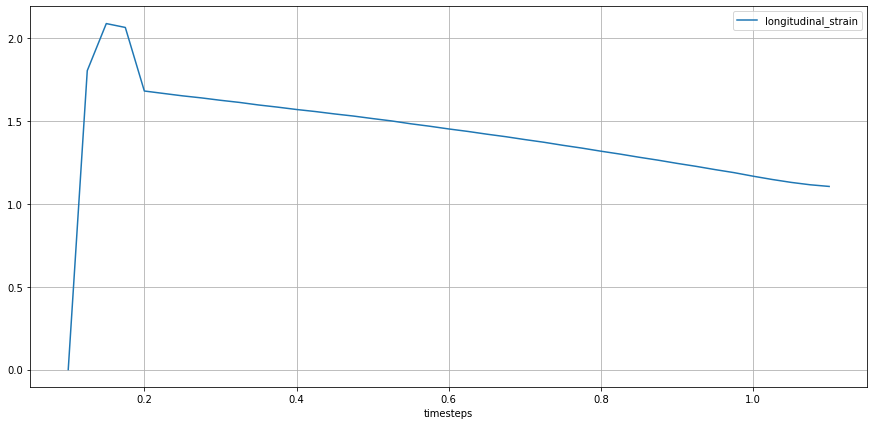

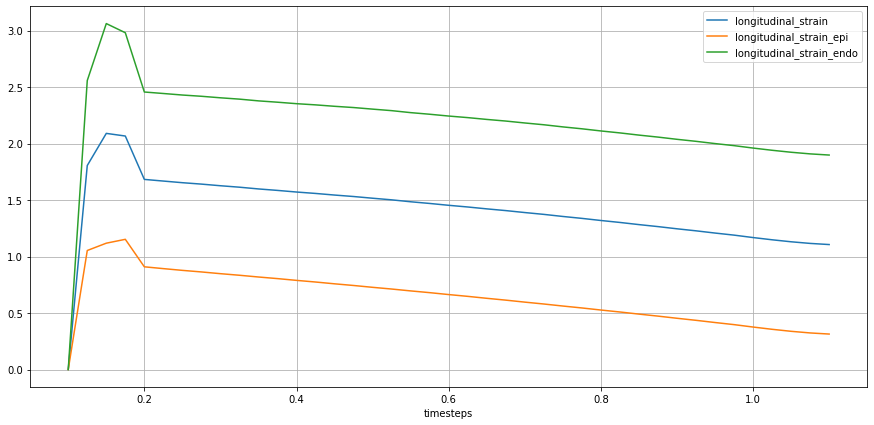

In [17]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.1,
    plot_infos=["group"])

Circumferential Strain:

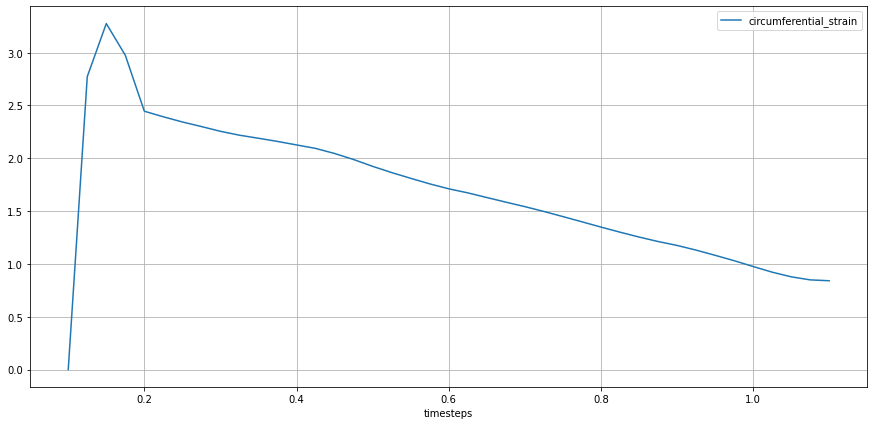

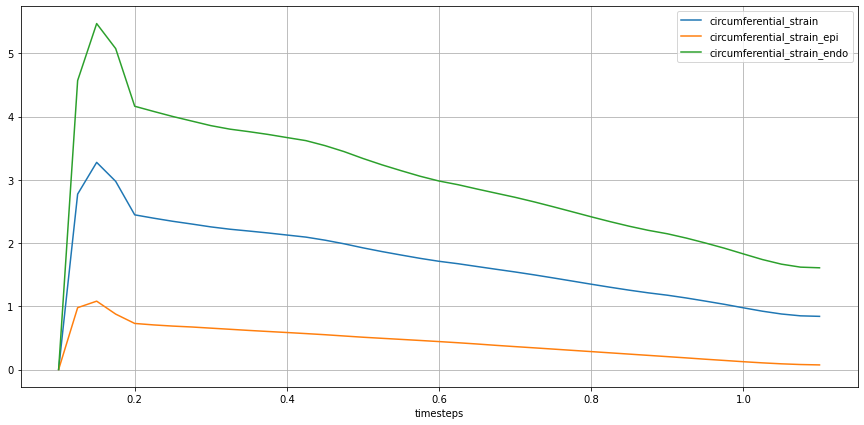

In [18]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.1,
    plot_infos=["group"])

Twist:

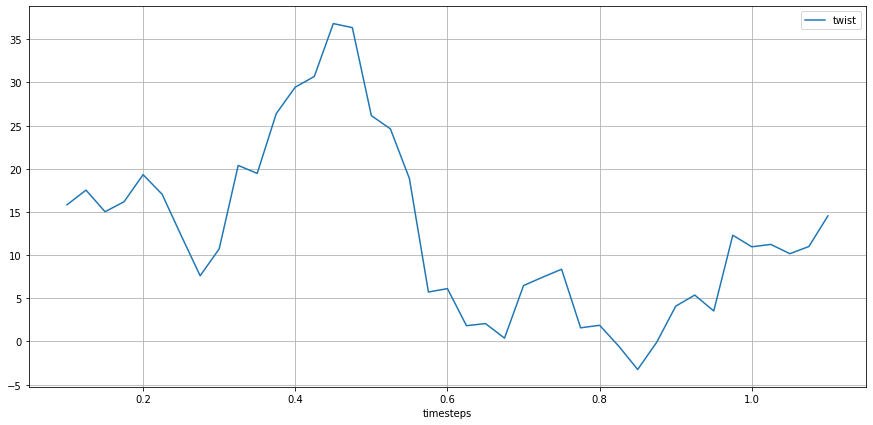

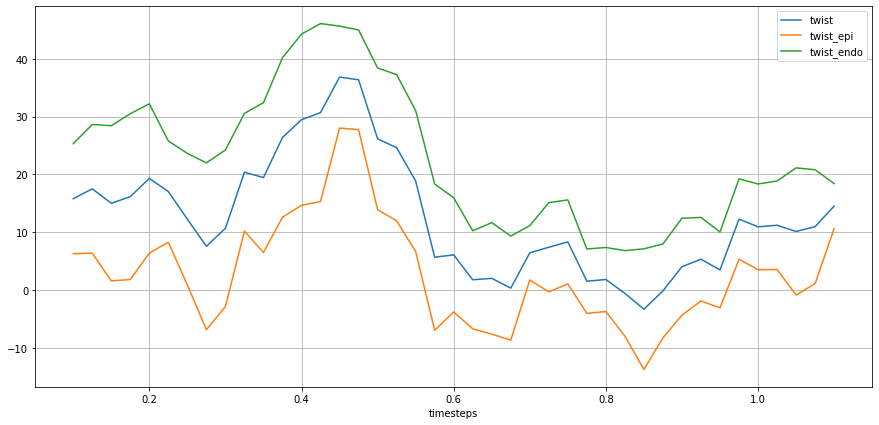

In [19]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.1,
    plot_infos=["group"])

Torsion:

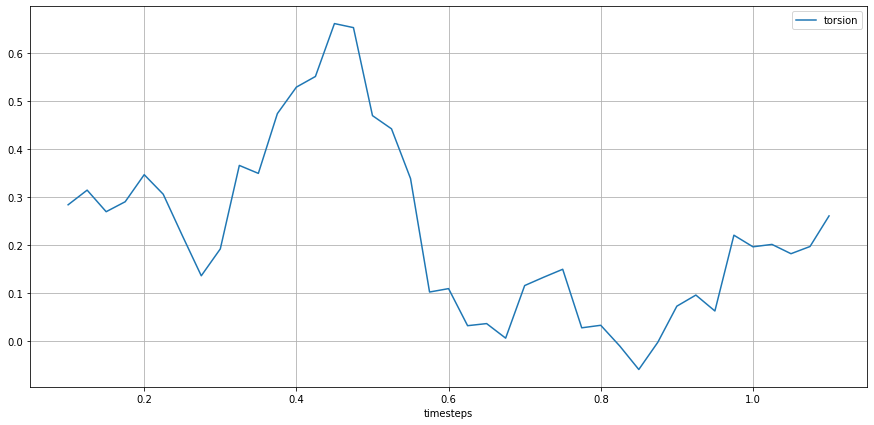

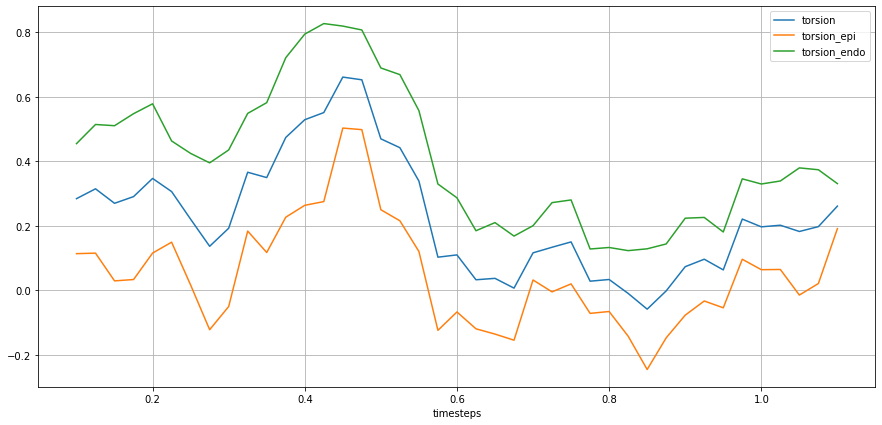

In [20]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.1,
    plot_infos=["group"])